# Transporte difusivo
### Juan S. Hincapié - Carlos Duque-Daza


## Esquemas espaciales
Las más conocidas son:

$$
\begin{aligned}
& \text{Forward Finite Difference: } \frac{d\phi}{dx} \approx \frac{\phi_{i+1}-\phi_{i}}{\Delta x} +  O(\Delta x) \\
& \text{Backward Finite Difference: }    \frac{d\phi}{dx} \approx \frac{\phi_{i}-\phi_{i-1}}{\Delta x} +  O(\Delta x) \\
& \text{Central Finite Difference: } \frac{d\phi}{dx} \approx \frac{\phi_{i+1}-\phi_{i-1}}{2\Delta x} +  O(\Delta x)^2 
\end{aligned}
$$


## Esquemas temporales

<div align='justify'> Los esquemas anteriores sirven para aproximar derivadas espaciales. ¿Qué hacemos con las derivadas temporales? Debemos seguir usando Euler en sus diferentes versiones:</div>

Tenindo la siguiente EDP:
$$
\frac{d\phi}{dt} = f (t,x,\phi)
$$

Esquema explícito (Euler hacia adelante):
$$
    \frac{\phi^{n+1}_{i}-\phi^{n}_{i}}{\Delta t} = f_i^{n} (t,x,\phi)
$$

Esquema implícito (Euler hacia atrás):
$$
    \frac{\phi^{n+1}_{i}-\phi^{n}_{i}}{\Delta t} = f_i^{n+1} (t,x,\phi)
$$

## Un nuevo esquema espacial 

El día de hoy aprenderemos a usar un nuevo esquema espacial, que nos ayudará a aproximar derivadas de orden 2.

$$
 \text{Central Finite Difference: } \frac{d^2\phi}{dx^2} \approx \frac{\phi_{i+1}-2\phi_{i} + \phi_{i-1}}{\Delta x^2} +  O(\Delta x)^2 
$$

## Ejercicio

<div align='justify'> Ingenieros de materiales de reconocida empresa están probando un nuevo equipo de laboratorio: un láser de alta potencia. Este dispositivo les permitirá llevar a cabo distintos tratamientos superficieles de manera rápida y precisa. Para calibrarlo, el grupo de ingenieros emplearon una barra de hierro fundida de sección transversal cuadrada de $2 \, m$ de largo. La barra se ubicó de tal manera en la mesa de ensayos para que el conjunto de láseres apuntaran justo en la mitad del largo. Adicional a esto, el montaje incluía un sistema de refrigeración que mantenía los extremos de la barra a $0 \, ^\circ C$. El montaje y dimensiones importantes se ilustran en a continuación:</div>

<img src=https://raw.githubusercontent.com/juhincapiem/ModMat/refs/heads/main/Diagrams/barraHierroFundido.png alt="Barrra hierro fundido" width="800" />

<div align='justify'> Una serie de sensores análogos registraron el perfil de temperatura a lo largo del eje $x$ para ese instante de tiempo, obteniendo lo siguiente: </div>

<img src=https://raw.githubusercontent.com/juhincapiem/ModMat/refs/heads/main/Diagrams/perfilTemperatura.png alt="Barrra hierro fundido" width="550" />

<div align='justify'> Desafortunadamente, los sensores análogos sufrieron un fallo técnico, y no pudieron seguir registrando la evolución de la temperatura a lo largo de la barra. Debido a esto, los ingenieros se vieron obligados a contactar a un grupo de modeladores matemáticos de la universidad Nacional de Colombia, para ...  </div><br>


<div align='justify'> $\color{Red}{\large{\textbf{1. Desarrollar un modelo matemático 1D que describa el comporatamiento térmico de la barra de hierro}}}$ </div>
 
 
\begin{equation}
\nabla \cdot(k\nabla T)+\dot g= \rho C_p\frac{d T}{d t} 
\label{gobernante}
\end{equation}

Con condiciones de frontera:

$$
T(t,x = 0) = T(t,x = L) = 0 \, ^\circ C
$$


Y condición inicial:


$$
T(t=0, x)=T_{\max } \exp \left(-\left(\frac{x-x_0}{\sigma}\right)^2\right)
$$

con $x_0 = 1.0$, $\sigma = 0.2$ y $T_{max} = 200 \, ^\circ C$

<br>
<div align='justify'> $\color{Red}{\large{\textbf{2. Discretizar la ecuación diferencial, usando diferencias centradas y esquema temporal implícito}}}$ </div>

$$
    -fo\cdot T_{i-1}^{n+1} + (2fo + 1)\cdot T_{i}^{n+1} - fo\cdot T_{i+1}^{n+1} = T_{i}^{n}
$$


<br>
<div align='justify'> $\color{Red}{\large{\textbf{3. Plantea el sistema de ecuaciones lineales.}}}$ </div>


$$
\left(\begin{array}{cccccc}
1 & 0 & 0 & 0 & 0 & 0 \\
-fo & (1+2 fo) & -fo & 0 & 0 & 0 \\
0 & -fo & (1+2 fo) & -fo & 0 & 0 \\
0 & 0 & -fo & (1+2 fo) & -fo & 0 \\
0 & 0 & 0 & -fo & (1+2 fo) & -fo \\
0 & 0 & 0 & 0 & 0 & 1
\end{array}\right) 
\cdot \left(\begin{array}{c}
T_0^{n+1} \\
T_1^{n+1} \\
T_2^{n+1} \\
T_{N-2}^{n+1} \\
T_{N-1}^{n+1} \\
T_{N}^{n+1}
\end{array}\right) =
\left(\begin{array}{c}
T_{\text {left }} \\
T_1^n \\
T_2^n \\
T_{N-2}^n \\
T_{N-1}^n \\
T_{\text {right }}
\end{array}\right)
$$


<br>
<div align='justify'> $\color{Red}{\large{\textbf{4. Resolver numéricamente.}}}$ </div>

Para esto, considere la conductividad térmica de la barra de hierro igual a $80.2 \, W/m.K$ y la difusividad térmica igual a $2.31 \times 10 ^{-5} \, m^2/s$

Use un $\Delta x = 0.05$ y un $\Delta t = 0.1$. Simule hasta $800$ segundos después.



In [177]:
import numpy as np
import matplotlib.pyplot as plt

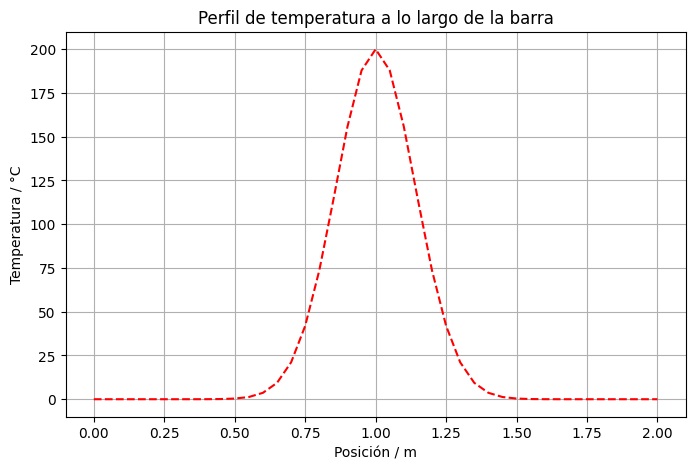

In [ ]:
# Paso 00: discretizar el dominio espacial
x0 = 0; xf = 2; dx = 0.05

# Paso 01: discretizar el dominio temporal
t0 = 0; tf = 800.0; dt = 0.1


# Paso 02: crear función para introducir condición inicial


# Paso 03: inicializar vector temperatura del presente 


# Paso 04: llenar el vector de presente con las condiciones inciales


# Paso 05: graficar para verificar las condiciones inciales


In [ ]:
# Paso 06: crear vector para almacenar las temperatura futuras


# Paso 07: propiedades del material:


# Paso 07: Llenar matriz A de coeficientes constantes


[[-1.001848e+00  9.240000e-04  0.000000e+00 ...  0.000000e+00
   0.000000e+00  0.000000e+00]
 [ 9.240000e-04 -1.001848e+00  9.240000e-04 ...  0.000000e+00
   0.000000e+00  0.000000e+00]
 [ 0.000000e+00  9.240000e-04 -1.001848e+00 ...  0.000000e+00
   0.000000e+00  0.000000e+00]
 ...
 [ 0.000000e+00  0.000000e+00  0.000000e+00 ... -1.001848e+00
   9.240000e-04  0.000000e+00]
 [ 0.000000e+00  0.000000e+00  0.000000e+00 ...  9.240000e-04
  -1.001848e+00  9.240000e-04]
 [ 0.000000e+00  0.000000e+00  0.000000e+00 ...  0.000000e+00
   9.240000e-04 -1.001848e+00]]


In [ ]:
# Paso 08: resolver el problema en el tiempo. ¡Importante! En cada iteración se debe actualizar el vector de cargas
for n in range(1,len(t)-1):
    
    # Llenamos el vector b
    b[0] = 
    b[1:-1] = 
    b[-1] = 
    
    # Resolvemos el sistema de ecuaciones

    
    # Actualizamos
    TPre= TFut.copy()
    

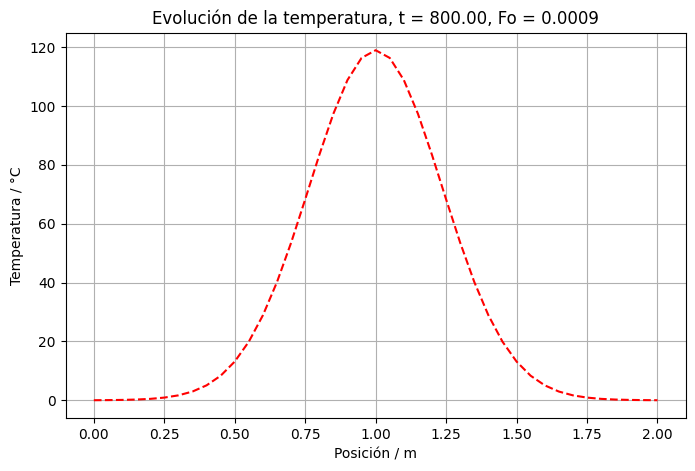

In [ ]:
# Paso 09: graficar para verificar las condiciones inciales


<div align='justify'> $\color{Red}{\large{\textbf{5. Graficar en una misma figura los perfiles de temperatura para 100, 800, 1000 y 2000 segundos}}}$ </div>

¿Si tiene sentido físico este comportamiento?

In [241]:
def solucionador01(x0,xf,dx,t0,tf,dt,alpha,k,sigma,Tmax):
    x = np.arange(x0, xf+dx, dx)
    t = np.arange(t0, tf+dt, dt)
    
    TPre = np.zeros(len(x))
    TFut = np.zeros(len(x))
    TPre[:] = CI(Tmax,x,sigma)
    
    Fo = alpha*dt/dx**2

    # Paso 07: Llenar matriz A de coeficientes constantes
    incog = len(x) - 2
    A = np.zeros((incog,incog))
    b = np.zeros(incog)

    for j in range(0,incog):
        for i in range(0,incog):
            if i == j:
                A[j,i] = -(2*Fo+1)
                if j > 0:
                    A[j,i-1] = Fo
                if j < incog - 1:
                    A[j,i+1] = Fo
    A_inv = np.linalg.inv(A)
    
    for n in range(1,len(t)-1):

        # Llenamos el vector b
        b[0] = -Fo*TPre[0] - TPre[1]
        b[1:-1] = -TPre[2:-2]
        b[-1] = -Fo*TPre[-1] - TPre[-2]

        # Resolvemos el sistema de ecuaciones
        TFut[1:-1] = np.dot(A_inv,b)

        # Actualizamos
        TPre= TFut.copy()
    return x,t,TFut

In [183]:
x0 = 0; xf = 2; dx = 0.02
t0 = 0; dt = 0.05
sigma = 0.2; Tmax = 200
k = 80.2        # W/m.K
alpha = 2.31e-5 # m2/s

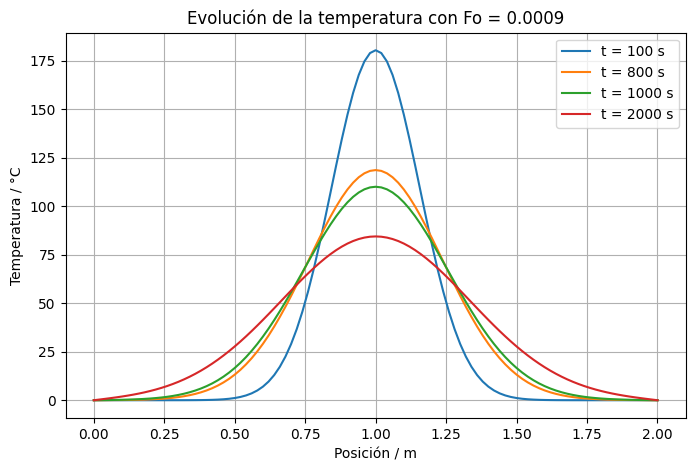

In [ ]:
# Paso 10: graficar varios perfiles


<div align='justify'> $\color{Red}{\large{\textbf{6. Comparar la solución numérica con la solución analítica}}}$ </div>

La solución analítica a este problema es:

$$
T(x, t)=\frac{T_{\max }}{\sqrt{1+4 t \alpha / \sigma^2}} \exp \left(\frac{-(x-1.0)^2}{\sigma^2+4 t \alpha}\right)
$$


Compare los perfiles de temperatura para los 400 segundos de evolución.

In [185]:
# Paso 11: comparar con solución analítica
solAnalitica = lambda t,x,sigma,Tmax,alpha: Tmax/(np.sqrt(1+4*t*alpha/sigma**2)) * np.exp(-(x-1.0)**2/(sigma**2+4*t*alpha))

In [ ]:
# Paso 12: llamar las funciones


$$
    \text{Error relativo} = \frac{\text{Error Absoluto}}{ \left|\text{Valor real}\right|} 
$$

Donde el error absoluto se define como:

$$
    \text{Error Absoluto} = \left|\text{Valor real} - \text{Valor aproximado}\right|
$$

In [ ]:
# Paso 13: calcular errores


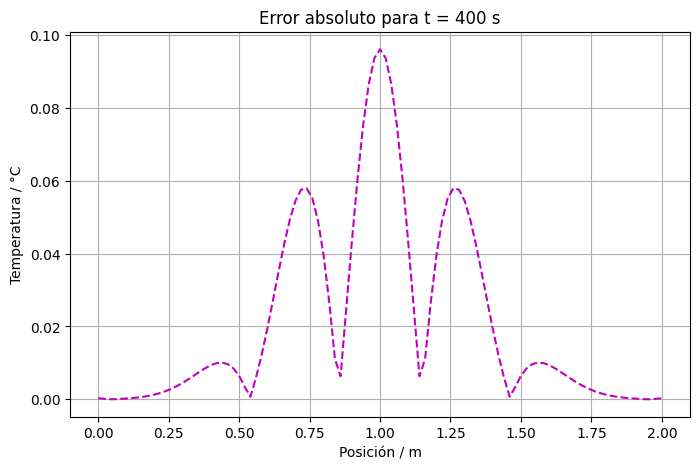

<div align='justify'> $\color{Red}{\large{\textbf{7.Hallar el perfil de temperatura para el estado estacionario.}}}$ </div>

Simplemente eliminamos el término acumulativo de la ecuación diferencial. El sistema de ecuaciones resultante es:

$$
\left(\begin{array}{cccccc}
1 & 0 & 0 & 0 & 0 & 0 \\
1 & (-2) & 1 & 0 & 0 & 0 \\
0 & 1 & (-2) & 1 & 0 & 0 \\
0 & 0 & 1 & (-2) & 1 & 0 \\
0 & 0 & 0 & 1 & (-2) & 1 \\
0 & 0 & 0 & 0 & 0 & 1
\end{array}\right) 
\cdot \left(\begin{array}{c}
T_0 \\
T_1 \\
T_2 \\
T_{N-2} \\
T_{N-1} \\
T_{N}
\end{array}\right) =
\left(\begin{array}{c}
T_{\text {left }} \\
0\\
0 \\
0 \\
0 \\
T_{\text {right }}
\end{array}\right)
$$

[[ 1.  0.  0.  0.  0.]
 [ 1. -2.  1.  0.  0.]
 [ 0.  1. -2.  1.  0.]
 [ 0.  0.  1. -2.  1.]
 [ 0.  0.  0.  0.  1.]]


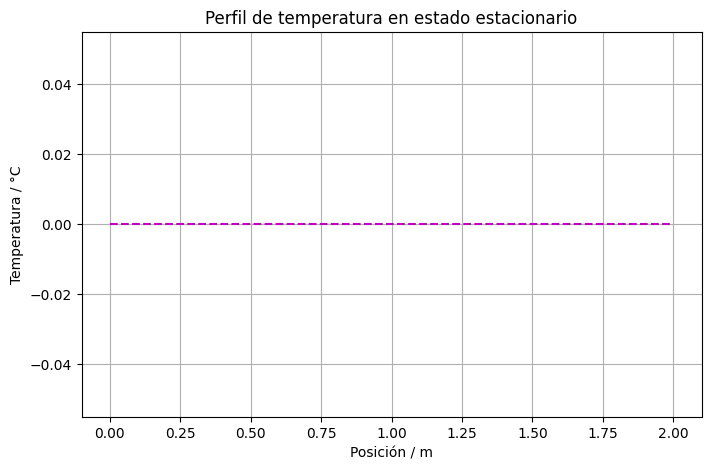

<div align='justify'> $\color{Red}{\large{\textbf{8. Encontrar el tiempo toma en llegar al estado estacionario.}}}$ </div>

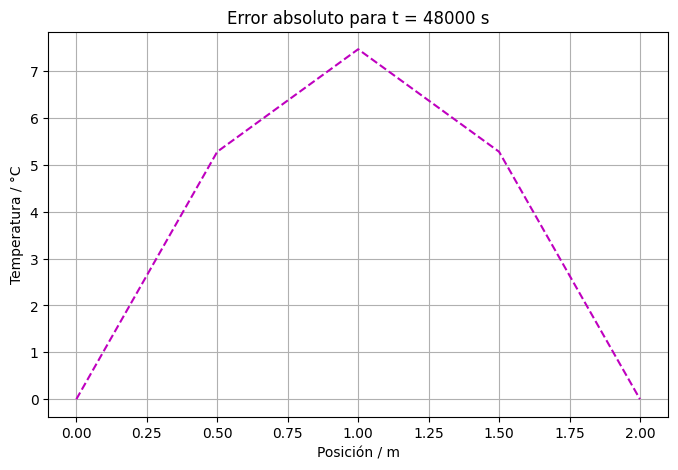